In [7]:
import os
import torch
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to('cuda')
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

df = pd.read_csv("trainLabels.csv")

C:\python\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


C:\python\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
sample_df = df.sample(500, random_state=42)
sample_df

,id,label
33553,33554,horse
9427,9428,ship
199,200,airplane
12447,12448,frog
39489,39490,automobile
...,...,...
314,315,cat
11449,11450,cat
30745,30746,ship
29702,29703,horse


In [5]:
class_names = df['label'].unique().tolist()
cifar10_classes = {idx: label for idx, label in zip(range(10), class_names)}

image_paths = [f"train/{img_id}.png" for img_id in sample_df["id"]]
images = [Image.open(img_path).convert("RGB") for img_path in image_paths]

inputs = processor(images=images, text=class_names, return_tensors="pt", padding=True).to("cuda")

with torch.no_grad():
    outputs = model(**inputs.to('cuda'))
    logits_per_image = outputs.logits_per_image  
    predicted_indices = logits_per_image.argmax(dim=1).cpu().tolist()
    predicted_labels = list(map(lambda x: cifar10_classes.get(x), predicted_indices))

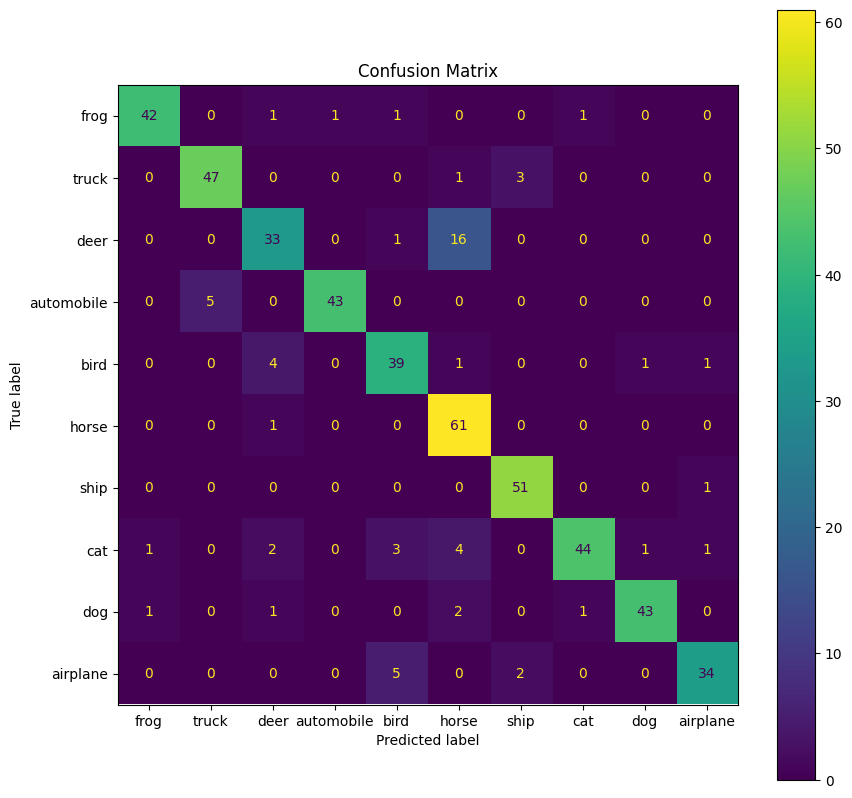

Accuracy: 0.874
Balanced Accuracy: 0.8713727636243418


In [13]:
y_true = sample_df['label']

acc = accuracy_score(y_true, predicted_labels)
balanced_acc = balanced_accuracy_score(y_true, predicted_labels)

cm = confusion_matrix(y_true, predicted_labels, labels=class_names)

plt.figure(figsize=(10, 10))
plt.title(f'Confusion Matrix')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=plt.gca())
plt.show()
print(f'Accuracy: {acc}')
print(f'Balanced Accuracy: {balanced_acc}')